<a href="https://colab.research.google.com/github/sanki1m/Housing-price-prediction/blob/main/Housing_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Importing libraries required for data manipulation, visualization, and modeling

> Add blockquote



In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

Fetch California housing dataset and create a DataFrame

In [ ]:
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target
df.head() ## Display first few rows of the DataFrame

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


from matplotlib import pyplot as plt
_df_0['MedInc'].plot(kind='hist', bins=20, title='MedInc')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['HouseAge'].plot(kind='hist', bins=20, title='HouseAge')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['AveRooms'].plot(kind='hist', bins=20, title='AveRooms')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['AveBedrms'].plot(kind='hist', bins=20, title='AveBedrms')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='MedInc', y='HouseAge', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='HouseAge', y='AveRooms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='AveRooms', y='AveBedrms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='AveBedrms', y='Population', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['MedInc'].plot(kind='line', figsize=(8, 4), title='MedInc')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['HouseAge'].plot(kind='line', figsize=(8, 4), title='HouseAge')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['AveRooms'].plot(kind='line', figsize=(8, 4), title='AveRooms')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['AveBedrms'].plot(kind='line', figsize=(8, 4), title='AveBedrms')
plt.gca().spines[['top', 'right']].set_visible(False)

Splitting dataset into features (X) and target (y) and Splitting the data into training and testing sets (80% train, 20% test)

In [ ]:
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Creating and training Random Forest Regressor with 100 trees

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Making predictions on the test set

In [ ]:
y_pred = rf.predict(X_test)


Calculating and displaying Root Mean Squared Error (RMSE) and R-squared (R²)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

RMSE: 0.5053399773665033
R² Score: 0.8051230593157366


Scatter plot comparing actual and predicted house prices

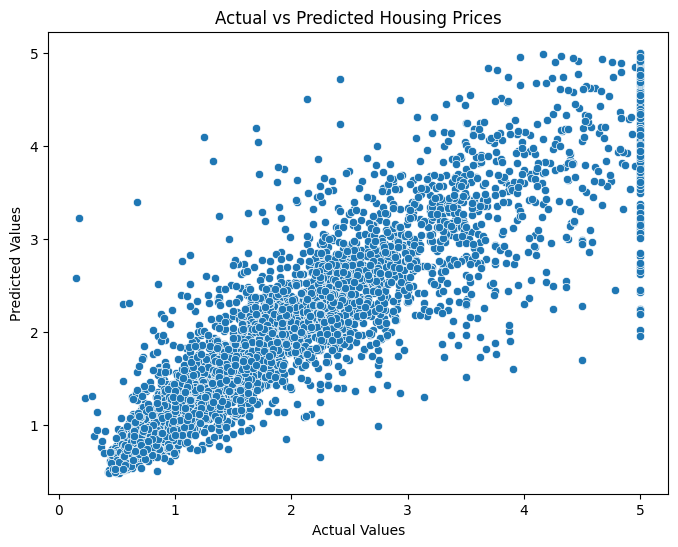

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Housing Prices")
plt.show()

Bar plot showing importance of each feature in the model

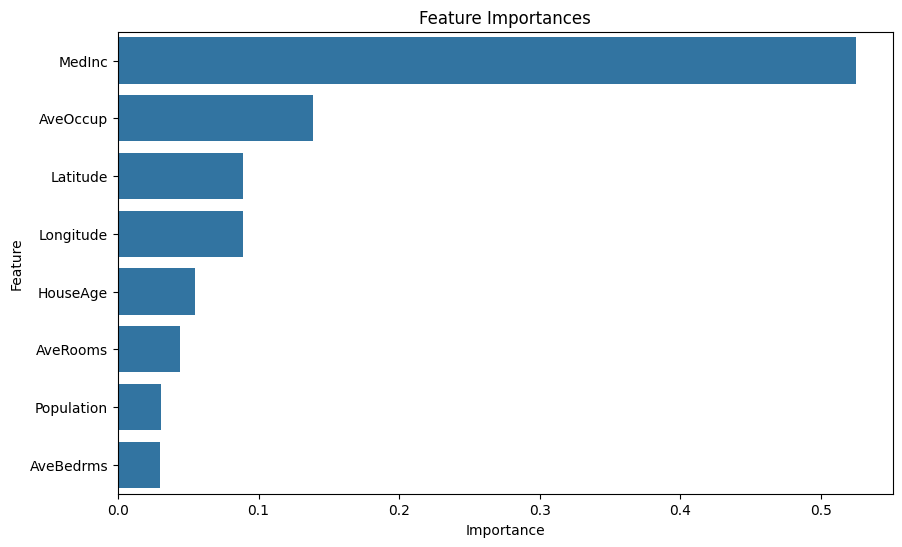

In [ ]:
importances = rf.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()